Let's find SVD of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random



In [2]:
#Sample from normal distribution with 2 columns
def sample_normal(n, mu, sigma):
    return np.random.normal(mu, sigma, (n, 2))

data = pd.DataFrame(sample_normal(100, 5, 1), columns=['x', 'y'])

In [3]:
data

,x,y
0,4.302562,6.147993
1,4.094033,4.872081
2,4.861652,5.469375
3,5.362704,4.898722
4,4.709437,4.919455
...,...,...
95,3.910815,5.907851
96,3.997908,5.453092
97,3.771741,5.157488
98,5.829365,4.994238


First, let's form the sample covariance matrix:

In [67]:
def sample_covariance(data):
    #For each cell in data[0] and data[1], subtract the mean of the column:
    data_zero_mean = data.iloc[:,0] - data.iloc[:,0].mean()
    data_one_mean = data.iloc[:,1] - data.iloc[:,1].mean()
    X_tilde = np.array([data_zero_mean, data_one_mean])
    Sigma = np.dot(X_tilde, X_tilde.T) / len(data)
    return Sigma

def diagonalize(Sigma):
    eigvals, eigvecs = np.linalg.eig(Sigma)
    sorted_indices = np.argsort(eigvals)[::-1]
    sorted_eigvals = eigvals[sorted_indices]
    sorted_eigvecs = eigvecs[:, sorted_indices]
    D = np.diag(sorted_eigvals)
    return sorted_eigvecs, D

Let's diagonalze our sample_covariance with function and analytically

In [68]:
eigenvectors, D = diagonalize(sample_covariance(data))

In [69]:
eigenvectors

array([[ 0.28073019, -0.95978673],
       [-0.95978673, -0.28073019]])

In [70]:
D

array([[0.87723311, 0.        ],
       [0.        , 0.77484484]])

Sanity check:

In [71]:
U = eigenvectors
Lambda = D
Sigma = U @ Lambda @ U.T
Sigma 

array([[ 0.78291401, -0.02758761],
       [-0.02758761,  0.86916395]])

In [72]:
sample_covariance(data)

array([[ 0.78291401, -0.02758761],
       [-0.02758761,  0.86916395]])

They're equal!

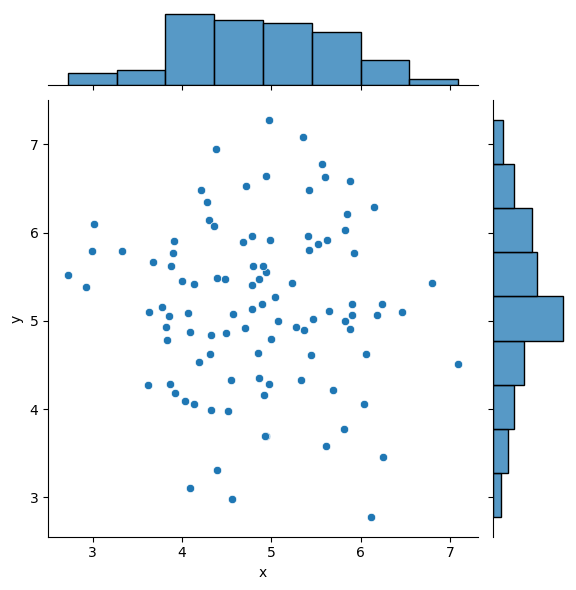

In [14]:
import warnings
warnings.filterwarnings('ignore')
sns.set_style=('whitegrid')
plot = sns.jointplot(x=data['x'], y=data['y'], kind='scatter')


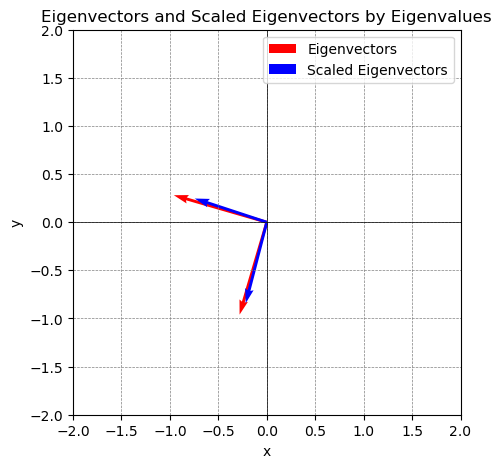

In [15]:
# Now draw the eigenvectors scaled by the eigenvalues using sns:

origin = np.array([[0, 0], [0, 0]])  # Origin point at (0,0)

# Plot
plt.figure(figsize=(5, 5))
plt.quiver(*origin, U[:, 0], U[:, 1], scale=1, color=['r', 'r'], angles='xy', scale_units='xy', label='Eigenvectors')

# Scale the eigenvectors by their eigenvalues
scaled_U = U * np.diag(D)

plt.quiver(*origin, scaled_U[:, 0], scaled_U[:, 1], scale=1, color=['b', 'b'], angles='xy', scale_units='xy', label='Scaled Eigenvectors')

# Plot settings
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Eigenvectors and Scaled Eigenvectors by Eigenvalues')
plt.legend()
plt.show()

### Part 2

$$
\tilde X := \tilde X_{i,j} = X_{i,j} - \frac{1}{n} \sum_{k=1}^{n} X_{k,j}
$$

SVD decomposition of X tilde:

$$
\tilde X = \tilde U \tilde S \tilde V^T
$$

We got $\tilde U$ and $\tilde V^T$ **orthogonal**

Now we'll compute the Sigma:

$$
\Sigma = \frac{1}{n} \tilde X^T \tilde X = \frac{1}{n}\tilde V \tilde S^T \tilde U^T \tilde U \tilde S \tilde V^T = \frac{1}{n} \tilde V \tilde S^2 \tilde V^T = \tilde V (\frac{\tilde S^2} {n}) \tilde V^T
$$


Therefore, we got orthogonal $\tilde V$ multiplied by $S^2$ multiplied by $\tilde V^T$

Now, we chose $\tilde V = U$

From lecture 3 we know that $S$ will have the square root of the $\tilde X^T \tilde X$ eigenvalues for cells $S_{i,i}$ for i = 1,2

We'll choose $S^2 /n$ as our diagonal matrix.

Lastly, we got the same composition as PCA immediately from SVD of $\tilde X$, where $S^2/n = \Lambda$

### Part 3

We can see that for every matrix $\tilde X$ if we perform PCA the eigenvalues from PCA decomposition of $\tilde X$ will be equal $\sigma_i^2 /n$ 


### Part 4

$X^TX = SVD(X^TX) = 

In [73]:
def Matrices(data):
    #For each cell in data[0] and data[1], subtract the mean of the column:
    data_zero_mean = data.iloc[:,0] - data.iloc[:,0].mean()
    data_one_mean = data.iloc[:,1] - data.iloc[:,1].mean()
    X_tilde = np.array([data_zero_mean, data_one_mean]).T
    Sigma = np.dot(X_tilde.T, X_tilde) / len(data)
    return Sigma, X_tilde,data_zero_mean

def diagonalize(Sigma):
    eigvals, eigvecs = np.linalg.eig(Sigma)
    sorted_indices = np.argsort(eigvals)[::-1]
    sorted_eigvals = eigvals[sorted_indices]
    sorted_eigvecs = eigvecs[:, sorted_indices]
    D = np.diag(sorted_eigvals)
    return sorted_eigvecs, D

In [74]:
Sigma, X_tilde ,data_zero_mean = Matrices(data)

In [75]:
U_tilde, sigma_tilde, V_t_tilde = np.linalg.svd(X_tilde)

In [76]:
V_t_tilde.T

array([[-0.28073019, -0.95978673],
       [ 0.95978673, -0.28073019]])

In [77]:
U, D = diagonalize(Sigma)
U

array([[ 0.28073019, -0.95978673],
       [-0.95978673, -0.28073019]])

In [ ]:
#Let's plot U and V
origin = np.array([[0, 0], [0, 0]])  # Origin point at (0,0)
sns.

##FInish later

We got that V = U up to numerical errors when searching for the right eigenvectors (the constant is different, in this case it's -1). The reason is that the computer searched for the right eigenvector using numerical method (For example, going through Gaussian distribution of potential eigenvectors) and every vector that multiplies the basis of the eigenspace by a constant can be an eigenvector.

In [78]:
D

array([[0.87723311, 0.        ],
       [0.        , 0.77484484]])

In [79]:
np.sqrt(D*100)

array([[9.36607235, 0.        ],
       [0.        , 8.80252716]])

In [80]:
S = np.diag(sigma_tilde) 
S 

array([[9.36607235, 0.        ],
       [0.        , 8.80252716]])

## Q2

## Part 1

Let's look at the SVD Algorithm

In this algorithm we take matrix A and decompose it to 3 matrices: U,S,V*.

Therefore, In a backward - stable algorithm we would expect:

Let's assume  

If we take $\tilde A = A + \Delta A$, such that $\Delta A \sim F(0,\sigma^2)$, $\quad$ For $\sigma^2 = \epsilon_ {mach} \cdot ||A||$, Which satisfies:

For $SVD(\tilde A) = \tilde{SVD} (A), \quad  ||\frac{\tilde A - A}{A}|| < O(\epsilon_{mach})$







## Part 2

Let $A \in \mathbb{R}^{mxn}$

In the Full SVD if we take A, we get SVD(A) = USV*.

Now in this S we got from the algorithm, if $m \neq n$ we're going to get rows or columns of 0 values, depends on the shape of the original matrix (if m > n we get rows of 0 values in the last rows of S matrix, otherwise we get columns of 0 values in the last columns of S matrix).

We want to get:


$SVD(\tilde A) = \tilde U \tilde S \tilde V^* =  \tilde{SVD} (A) =  U \cdot (1+\delta_U)_{mxm} \cdot S \cdot (1+\delta_S)_{mxn} \cdot V^* \cdot (1+\delta_V)_{nxn}$, for $\quad  ||\frac{\tilde A - A}{A}|| < O(\epsilon_{mach})$

We know that in the full SVD, we first take A*A, than diagonalize it and our V matrix is the diagonalizing matrix.

Then, in this decomposition we take the non negative eigenvalues and compute the square root of each one and these are our singular values.

If we insert to our SVD algorithm a matrix with pertubation, meaning $A + \Delta A$,  it can affect drastically the matrices we're going to get.

Thus, we're comparing the accurate SVD on $\tilde A$ and the numerical SVD on A, which adds numerical error for each cell in the numerical U,S,V matrices.

We're not expecting the two terms to be equal and therefore the SVD is not backward stable.

Moreover,

Singular vectors (columns of U and V) can be highly sensitive to perturbations, especially when singular values are close to each other. 

This sensitivity means that small changes in A can lead to large changes in $\tilde U$ and $ \tilde V$. Thus, We'll expect to get: $\quad$ $SVD(\tilde A) \neq \tilde{SVD} (A)$



### Part3

The advantages of the reduced form SVD and its potential backward stability are influenced by the rank r of the matrix:

**Low Rank** (r much smaller than min(m, n)):
When the matrix A has a low rank, the reduced SVD captures the most important features of the matrix. The singular vectors and values retained in the reduced SVD are typically less sensitive to perturbations, leading to better backward stability.

**high Rank** (r close to min(m, n)):
If the matrix has full rank, the reduced SVD is equivalent to the full SVD. In this case, the sensitivity issues and backward stability concerns of the full SVD apply. The advantage of the reduced form in terms of stability diminishes as r approaches the rank of the full matrix.

Furthermore, A matrix might be theoretically full rank, but if some singular values are very small, it behaves like a lower-rank matrix numerically.
When computing the reduced SVD, the numerical rank (the number of nonzero singular values) determines the rank.

Still, the reduced SVD algorithm is still sensitive to small changes so we don't expect the accurate reduced SVD on A with added pertubation to be identical $U \cdot (1+\delta_U)_{mxm} \cdot S \cdot (1+\delta_S)_{mxm} \cdot V^* \cdot (1+\delta_V)_{mxm}$

### Part 4

This means that there for every X theres $\tilde X$ which satisfies, for example for the full SVD:  

**$ \displaystyle \frac{||X - \tilde X||}{||X||} = O(\epsilon_{mach}) \quad $ and $ \displaystyle \quad \frac{|| U \cdot (1+\delta_U)_{mxm} \cdot S \cdot (1+\delta_S)_{mxn} \cdot V^* \cdot (1+\delta_V)_{nxn} - \tilde U \tilde S \tilde V^*||}{||\tilde U \tilde S \tilde V^*||} = O(\epsilon_{mach})$**

This means the for every Matrix X we can find a matrix that is similar enough to it which suffices that the algorithm can yield accurate results numerically but we can have some errors up to epsilon machine, relative to the size of $\tilde SVD$

## Q3

### Part 1

In [100]:
import numpy as np

def lcg(m, a, c, n):
    s0_list = np.array([])
    s0 = random.randint(0, m)
    for i in range(n):
        s0 = (a * s0 + c) % m
        s0_list = np.append(s0_list, s0)
    return s0_list




In [101]:
A = [lcg(2**32, 22695477, 1, 10) for i in range(10)]

In [102]:
A = np.array(A)
A


array([[3.59377470e+09, 1.36861193e+09, 2.67337453e+09, 1.81602782e+09,
        3.32349630e+09, 2.12898420e+09, 2.90160291e+09, 1.73125260e+09,
        1.47243818e+09, 2.31184920e+09],
       [3.23745311e+09, 3.82867323e+09, 3.10243345e+09, 2.71606696e+09,
        3.82280772e+09, 7.03420970e+08, 3.69730936e+09, 1.91372418e+09,
        4.70148177e+08, 7.76139462e+08],
       [1.62633490e+08, 1.27714988e+09, 2.69525266e+09, 3.92387177e+09,
        3.51456046e+08, 3.96519540e+09, 2.19698840e+09, 2.81880973e+09,
        2.09902299e+09, 2.35294837e+09],
       [2.14954740e+08, 1.62500724e+09, 1.43206542e+09, 2.95344578e+09,
        2.67145150e+09, 3.28133637e+09, 3.87957149e+09, 1.96335510e+09,
        4.20428369e+09, 2.02467843e+09],
       [2.52904740e+09, 2.65401848e+09, 6.91921530e+08, 2.10901792e+09,
        3.51801008e+09, 3.10474557e+09, 1.51731663e+09, 1.53227534e+09,
        9.69204124e+08, 3.74710203e+09],
       [3.46663437e+09, 3.32023637e+08, 5.95503770e+08, 2.23715274e+09,
   

### Part 2

In [191]:
def lcg_module4_reminder(m, n):
    a = random.randint(0, m)
    s0_list = np.array([a])
    s1_list = np.array([a])
    s0 = a
    s1 = a
    for i in range(n):
        s0 = s0 % 4
        s1 = np.floor(4 * s1 / m)
        s0_list = np.append(s0_list, s0)
        s1_list = np.append(s1_list, s1)
    return pd.DataFrame({'s0': s0_list,'s1':s1_list})

In [285]:
lcg_module4_reminder(100, 10)

,s0,s1
0,71,71.0
1,3,2.0
2,3,0.0
3,3,0.0
4,3,0.0
5,3,0.0
6,3,0.0
7,3,0.0
8,3,0.0
9,3,0.0


We know that the second method is broken because of the following reasons:

First, let's look at $\lfloor  4s_n / m \rfloor$. 

We want to get $\lfloor  4s_n / m \rfloor \leq 3 \Rightarrow   4s_n / m  < 4$.

Therefore, we have to take $s_0 < m$ in order for the second method to work. But, in large number even this condition can fail.

THe reason is that floor function is not stable- it's highly sensitive to small change in decimal point.


M smaller than $s_0$:

In [287]:
def lcg_module4_reminder(m, n):
    a = 10
    s0_list = np.array([a])
    s1_list = np.array([a])
    s0 = a
    s1 = a
    for i in range(n):
        s0 = s0 % 4
        s1 = np.floor(4 * s1 / m)
        s0_list = np.append(s0_list, s0)
        s1_list = np.append(s1_list, s1)
    return pd.DataFrame({'s0': s0_list,'s1':s1_list})

lcg_module4_reminder(6, 10)

,s0,s1
0,10,10.0
1,2,6.0
2,2,4.0
3,2,2.0
4,2,1.0
5,2,0.0
6,2,0.0
7,2,0.0
8,2,0.0
9,2,0.0


Numerically unstable:

In [161]:
def lcg_module4_reminder(m, n):
    a = 10**30 
    s0_list = np.array([a])
    s1_list = np.array([a])
    s0 = a
    s1 = a
    for i in range(n):
        s0 = s0 % 4
        s1 = np.floor(4 * s1 / m)
        s0_list = np.append(s0_list, s0)
        s1_list = np.append(s1_list, s1)
    return pd.DataFrame({'s0': s0_list,'s1':s1_list})
    
lcg_module4_reminder(10**30  +5, 10)

,s0,s1
0,1000000000000000000000000000000,1000000000000000000000000000000
1,0,4.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


## Q4

### Part 1

We'll draw 1000 sample of ($rcos \theta, rsin \theta$), 


$r \sim U(0,1), \theta \sim U(0,2 \pi)$

In [606]:
def Naive_sample_r_theta(n):
    r = np.random.uniform(0, 1, n)
    theta = np.random.uniform(0, 2*np.pi, n)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    print(sum(x**2 + y**2<=1))
    return plt.scatter(x, y)
    #return x, y

def PRNG_sample_r_theta(m,a,c,n):
    r = 0 + lcg(m, a, c, n)/m *1
    theta = 0 + lcg(m, a, c, n)/m * 2*np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y 
    
    
    



100000


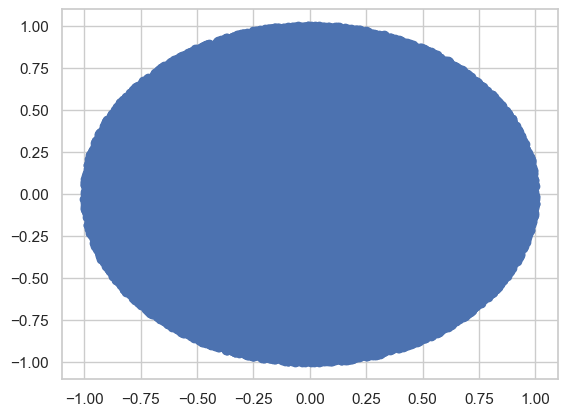

In [587]:
Naive_sample_r_theta(10**5)

In [613]:
x,y = PRNG_sample_r_theta(2**32, 22695477, 1, 10**5)

<Axes: >

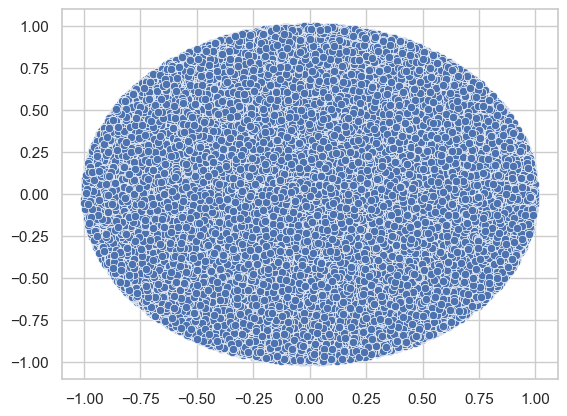

In [615]:
sns.scatterplot(x=x, y=y)

## Part 2

In [179]:
def unit_square_pick(m,a,c,n):
    x_list = np.array([])
    y_list = np.array([])
    for i in range(n):
        x =  -1 + lcg(m, a, c, 1)/m *2
        y = -1 + lcg(m, a, c, 1)/m *2
        # Make x,y 2d RV:
        xy = np.array([x, y])
        # Check if x,y is in the unit circle:
        if x**2 + y**2 <1:
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)
    return x_list, y_list

In [616]:
x_list, y_list = unit_square_pick(2**32, 22695477, 1, 10**4)

<Axes: >

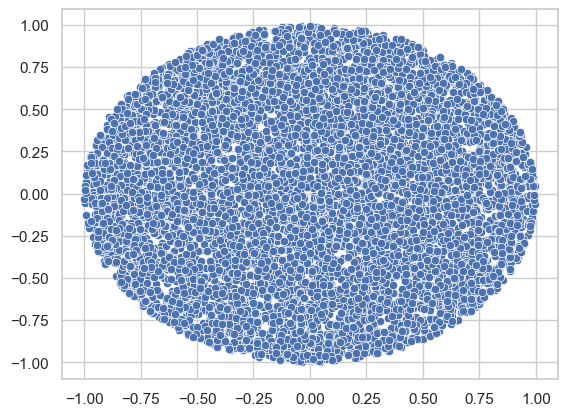

In [617]:
sns.scatterplot(x=x_list, y=y_list)

## Part 3

$$
P(r \leq r_0) = \frac{\text{Area of smaller disk}}{\text{ Area of unit disk}} = \frac{\pi r_0^2}{\pi \cdot 1^2} = r_0^2
$$

We'll use both methods:

In [198]:
def PRNG_sample_r_theta(m,a,c,n):
    r = 0 + lcg(m, a, c, n)/m *1
    theta = 0 + lcg(m, a, c, n)/m * 2*np.pi
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y 
    

def unit_circle(m,a,c,n):
    x_list = np.array([])
    y_list = np.array([])
    for i in range(n):
        x =  -1 + lcg(m, a, c, 1)/m *2
        y = -1 + lcg(m, a, c, 1)/m *2
        # Make x,y 2d RV:
        xy = np.array([x, y])
        # Check if x,y is in the unit circle:
        if x**2 + y**2 <= 1:
            x_list = np.append(x_list, x)
            y_list = np.append(y_list, y)
    return x_list, y_list

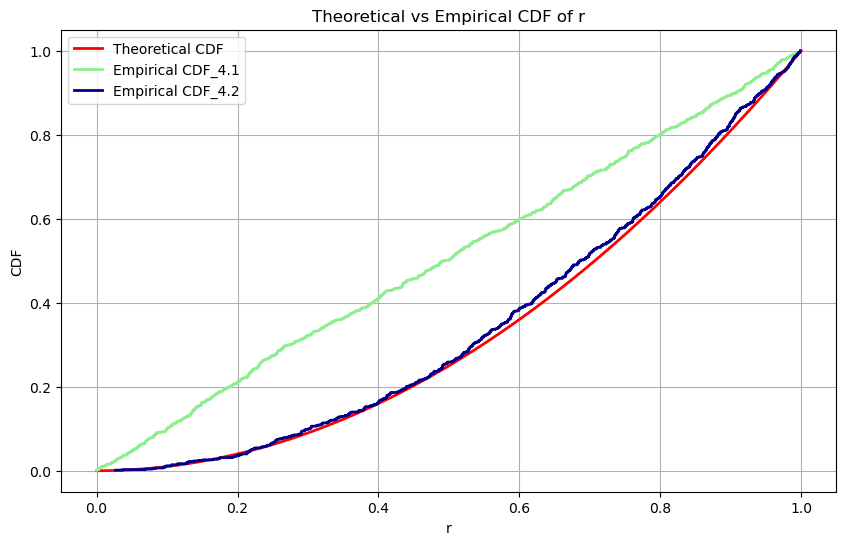

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(123)
n = 1000

x1,y1 = PRNG_sample_r_theta(2**32, 22695477, 1, n)
x2,y2 = unit_circle(2**32, 22695477, 1, n)
r1 = np.sqrt(x1**2 + y1**2)
r2 = np.sqrt(x2**2 + y2**2)

# Theoretical CDF function
def theoretical_cdf(r):
    return r**2

r1_sorted = np.sort(r1)
r2_sorted = np.sort(r2)

empirical_cdf1 = np.arange(1, len(r1_sorted) + 1) / len(r1_sorted)
empirical_cdf2 = np.arange(1, len(r2_sorted) + 1) / len(r2_sorted)


# Plotting
plt.figure(figsize=(10, 6))

# Plot theoretical CDF
r_vals = np.linspace(0, 1, 1000)
theoretical_vals = theoretical_cdf(r_vals)
plt.plot(r_vals, theoretical_vals, label='Theoretical CDF', color='red', linewidth=2)

plt.step(r1_sorted, empirical_cdf1, label='Empirical CDF_4.1', color='lightgreen', linewidth=2, where='post')
# Plot empirical CDF
plt.step(r2_sorted, empirical_cdf2, label='Empirical CDF_4.2', color='darkblue', linewidth=2, where='post')

# Add labels and title
plt.xlabel('r')
plt.ylabel('CDF')
plt.title('Theoretical vs Empirical CDF of r')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Part 4

Let X be a continuous real random variable with CDF F. 

Let Y = F(X), we'll prove:

$Y\sim U(0,1)$

In other words, we'll show that P(Y<t) = t, for any $t \in [0,1]$

Let $t \in [0,1]$.

We know that for every CDF, $F^{-1}$ is defined. So let's write the probability:



$$
P(Y<t) = P(F(X) < t) = P(F^{-1}F(X) < F^{-1}(t)) = P(X < F^{-1}(t)) = F(F^{-1})(t) = t
$$


Therefore, Y distributes uniform with [0,1] because $t \in [0,1]$.

## Part 5

We'll find function g such that r = g([U[0,1]]) and $\theta \sim U[0,2\pi]$ 

So, from Part 4: we'll take $u \sim U[0,1]$ and we'll take $u = r^2$ $\Rightarrow$ $u = \sqrt{r}$

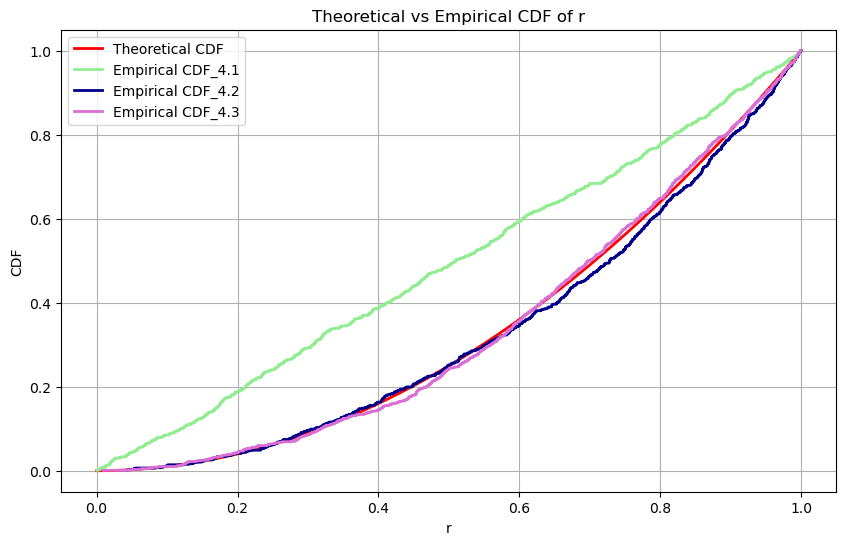

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set seed for reproducibility
np.random.seed(123)
n = 1000

x1,y1 = PRNG_sample_r_theta(2**32, 22695477, 1, n)
x2,y2 = unit_circle(2**32, 22695477, 1, n)
u = np.random.uniform(0, 1, n)
r1 = np.sqrt(x1**2 + y1**2)
r2 = np.sqrt(x2**2 + y2**2)
r3 = np.sqrt(u)

# Theoretical CDF function
def theoretical_cdf(r):
    return r**2

r1_sorted = np.sort(r1)
r2_sorted = np.sort(r2)
r3_sorted = np.sort(r3)

empirical_cdf1 = np.arange(1, len(r1_sorted) + 1) / len(r1_sorted)
empirical_cdf2 = np.arange(1, len(r2_sorted) + 1) / len(r2_sorted)
emporical_cdf3 = np.arange(1, len(r3_sorted) + 1) / len(r3_sorted)

# Plotting
plt.figure(figsize=(10, 6))

# Plot theoretical CDF
r_vals = np.linspace(0, 1, 1000)
theoretical_vals = theoretical_cdf(r_vals)
plt.plot(r_vals, theoretical_vals, label='Theoretical CDF', color='red', linewidth=2)

plt.step(r1_sorted, empirical_cdf1, label='Empirical CDF_4.1', color='lightgreen', linewidth=2, where='post')
# Plot empirical CDF
plt.step(r2_sorted, empirical_cdf2, label='Empirical CDF_4.2', color='darkblue', linewidth=2, where='post')

plt.step(r3_sorted, emporical_cdf3, label='Empirical CDF_4.3', color='orchid', linewidth=2, where='post')

# Add labels and title
plt.xlabel('r')
plt.ylabel('CDF')
plt.title('Theoretical vs Empirical CDF of r')
plt.legend()
plt.grid(True)

# Show plot
plt.show()